In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
%run util.py

In [2]:
def resize_frames(frames, output_size):
    N, P, Q = frames.shape
    R, S = output_size
    resized_frames = np.zeros((N, 1, R, S), dtype=np.uint8)

    for i in range(N):
        frame = frames[i]
        
        # 确保frame是8位无符号整数
        frame = frame.astype(np.uint8)
        
        # 调整帧大小
        resized_frame = cv2.resize(frame, (S, R))
        resized_frames[i, 0] = resized_frame

    return resized_frames

In [20]:
# ============Target setting============
Material = 'GaN'
Score = '0'
index = 0
video_total_num = 40
# ======================================
offset1 = 67
offset2 = 29
center = 359

In [21]:
triple_Dataset = []
quintu_Dataset = []
start_point = 0
for video_num in tqdm(range(start_point,video_total_num+start_point)):
    category_dir = Material+'_'+Score
    video_dir = '.\\video'
    video_name = category_dir+'_'+str(video_num)
    video_concrate_path = os.path.join(video_dir,category_dir,category_dir+'_'+str(index),video_name+'.mp4')
    frames = VideoLoad(video_concrate_path)
    output_size = (400,800)
    images = extract_bright_window(frames, output_size)
    frames_num = images.shape[0]
    weights = np.array([0.2989, 0.5870, 0.1140])
    images_gray = np.dot(images[..., :3], weights)
    cut_images = images_gray[:,0:360,center-300:center+300]
    offset_triple_list = []
    offset_quintu_list = []
    period_num = frames_num // 75
    for i in range(period_num):
        offset_triple_list.append((offset1-1+75*i)%frames_num)
        offset_triple_list.append((offset1+75*i)%frames_num)
        offset_triple_list.append((offset1+1+75*i)%frames_num)
    for i in range(period_num):
        offset_quintu_list.append((offset2-1+75*i)%frames_num)
        offset_quintu_list.append((offset2+75*i)%frames_num)
        offset_quintu_list.append((offset2+1+75*i)%frames_num)
    triple_line_images = cut_images[offset_triple_list,:,:]
    quintu_line_images = cut_images[offset_quintu_list,:,:]
    triple_Dataset.append(triple_line_images)
    quintu_Dataset.append(quintu_line_images)
T_dataset = np.vstack(triple_Dataset)
Q_dataset = np.vstack(quintu_Dataset)
print(T_dataset.shape,Q_dataset.shape)

100%|██████████| 40/40 [13:02<00:00, 19.56s/it]


(717, 360, 600) (717, 360, 600)


In [23]:
# 创建一个大小为 (2N, H, W) 的数组来存储结果
result = np.empty((T_dataset.shape[0] + Q_dataset.shape[0], T_dataset.shape[1], T_dataset.shape[2]), dtype=T_dataset.dtype)
result[0::2] = T_dataset  # 奇数位
result[1::2] = Q_dataset  # 偶数位
resized_frames = resize_frames(result, (36,60))

In [26]:
np.save('TEST_NEW.npy',resized_frames)

In [10]:
resized_frames.shape

(1392, 1, 36, 60)

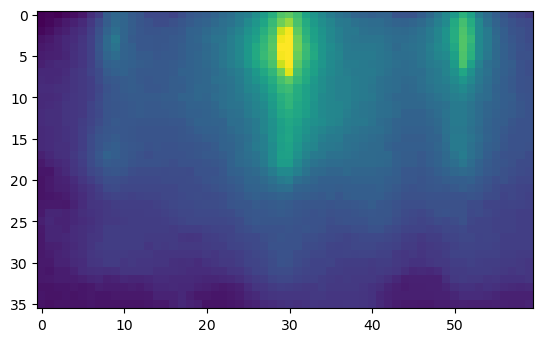

In [13]:
plt.imshow(resized_frames[1002,0])

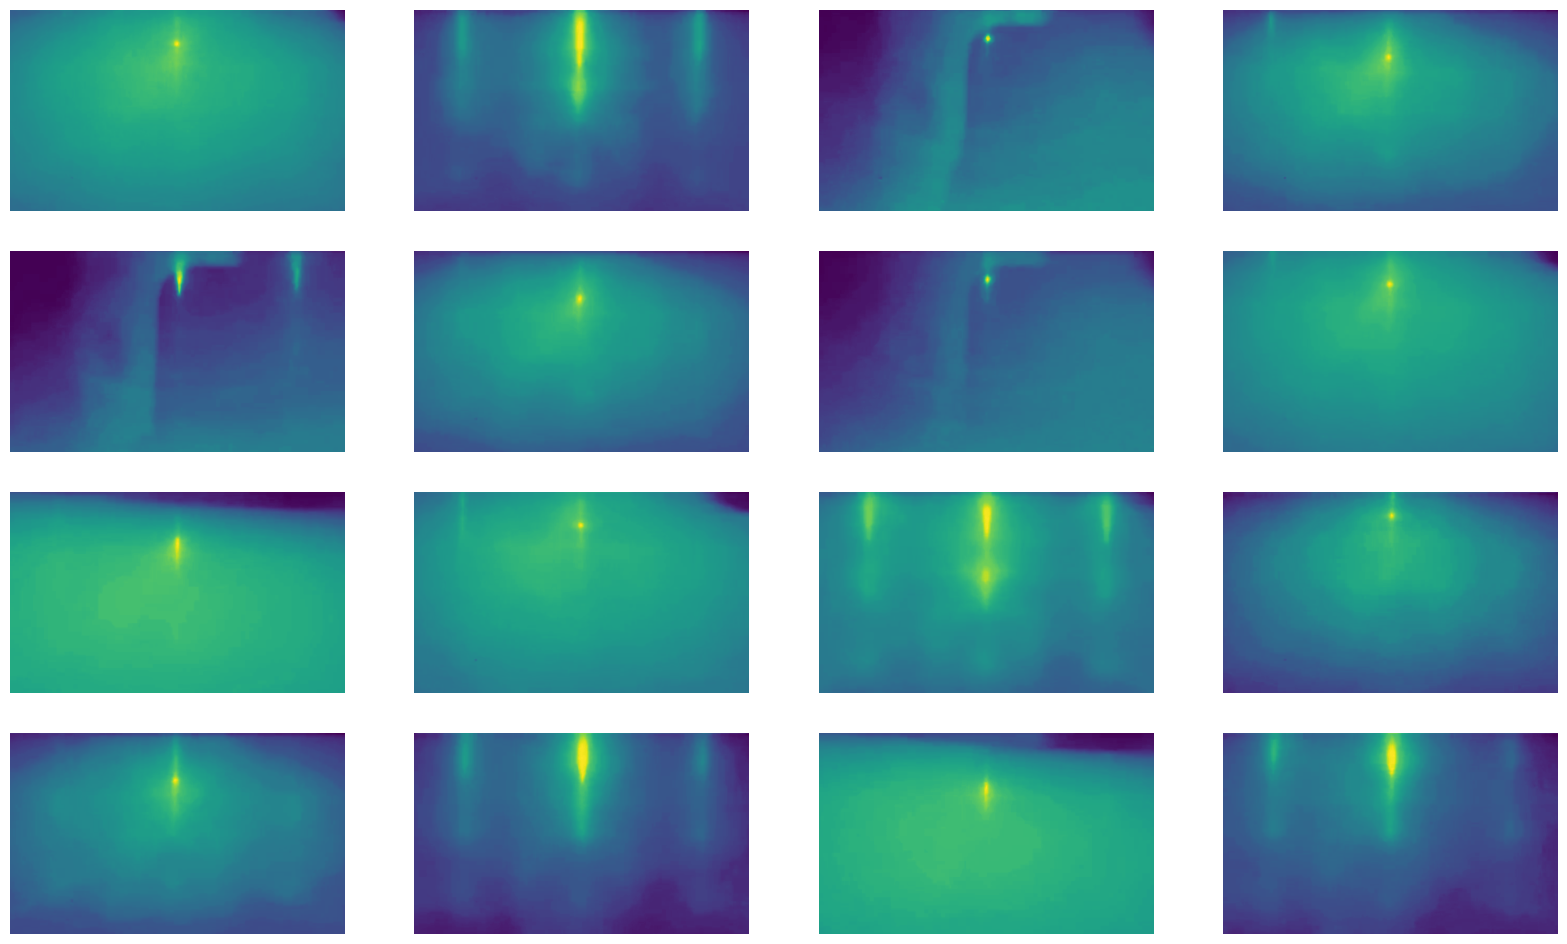

In [6]:
Target = T_dataset
random_indices = np.random.choice(Target.shape[0], 16, replace=False)
sampled_images = Target[random_indices]
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(sampled_images[i])
    ax.axis('off')
plt.show()

In [17]:
dir_name = os.path.join('Dataset', Material, Score)

if not os.path.exists(dir_name):
    os.makedirs(dir_name)
file_name = Material+'_'+Score
T_file_name = file_name+'_'+'T'
Q_file_name = file_name+'_'+'Q'


if index is not None:
    T_file_name += '_'+str(index)
    Q_file_name += '_'+str(index)

np.save(os.path.join(dir_name,T_file_name+'.npy'),T_dataset)
np.save(os.path.join(dir_name,Q_file_name+'.npy'),Q_dataset)

In [41]:
Q_dataset.shape

(192, 360, 600)